## Twitter US Airline Sentiment

### Analyze how travelers in February 2015 expressed their feelings on Twitter

### Sentiment Analysis

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

For example, it contains whether the sentiment of the tweets in this set was positive, neutral, or negative for six US airlines:

#### Breakdown of this notebook:

1. Loading the dataset: Load the data and import the libraries.

In [2]:
#importing libraries
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.cross_validation import train_test_split
import numpy

In [204]:
tweet = pd.read_csv("Tweets.csv")
print(tweet.shape)
tweet.head()

(14640, 15)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


Checking for null values in the data

In [205]:
tweet.isna().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

**tweet_coord , airline_sentiment_gold, negativereason_gold** have more than 90% missing data. It will be better to delete these columns as they will not provide any constructive information

In [206]:
del tweet['tweet_coord']
del tweet['airline_sentiment_gold']
del tweet['negativereason_gold']

In [207]:
tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [208]:
mood = tweet['airline_sentiment'].value_counts()
mood

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

Text(0.5,1,'Count of Sentiments')

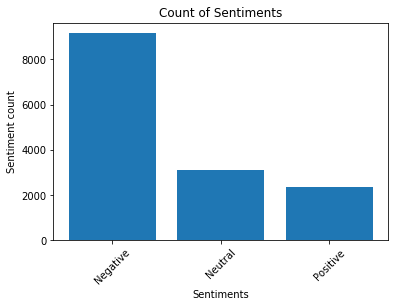

In [209]:
plt.bar(['Negative','Neutral','Positive'], mood)
plt.xticks(rotation=45)
plt.xlabel("Sentiments")
plt.ylabel("Sentiment count")
plt.title("Count of Sentiments")

In [210]:
tweet.airline.value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

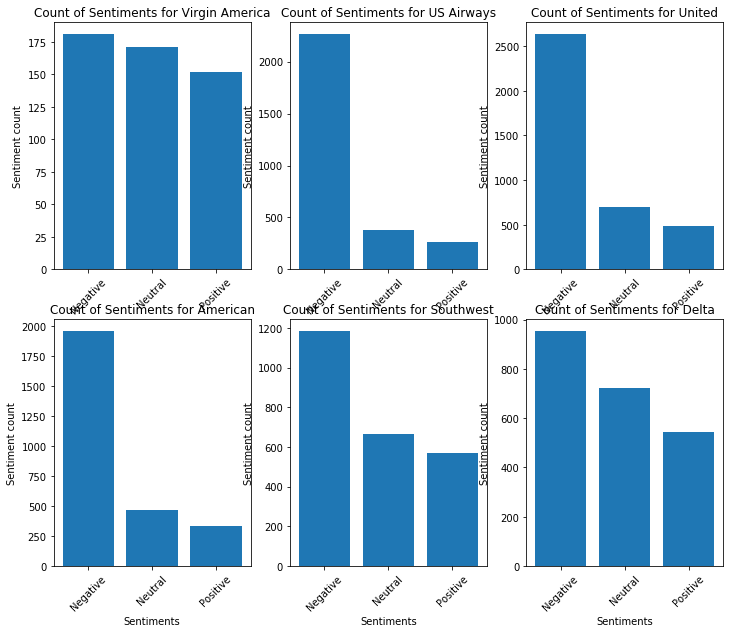

In [211]:
def plot_data(Airline):
    data = tweet[tweet.airline == Airline]['airline_sentiment'].value_counts()
    plt.bar(['Negative','Neutral','Positive'], data)
    plt.xticks(rotation=45)
    plt.xlabel("Sentiments")
    plt.ylabel("Sentiment count")
    plt.title("Count of Sentiments for "+Airline)

plt.figure(1,figsize=(12, 10))
plt.subplot(231)
plot_data('Virgin America')
plt.subplot(232)
plot_data('US Airways')
plt.subplot(233)
plot_data('United')
plt.subplot(234)
plot_data('American')
plt.subplot(235)
plot_data('Southwest')
plt.subplot(236)
plot_data('Delta')



In [212]:
reasons = list(set(tweet.negativereason[tweet.negativereason.notnull()]))

In [213]:
reason_count = tweet.negativereason.value_counts()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

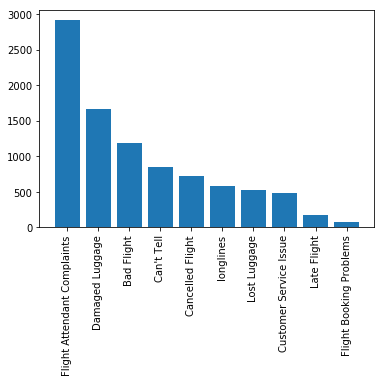

In [214]:
plt.bar(reasons, reason_count)
plt.xticks(rotation=90)

In [215]:
def plot_reasons(Airline):
    data = tweet[tweet.airline == Airline]
    reasons = list(set(data.negativereason[data.negativereason.notnull()]))
    reason_count = data.negativereason.value_counts()
    plt.bar(reasons, reason_count)
    plt.xticks(rotation=90)
    plt.title("Reason count for "+ Airline)

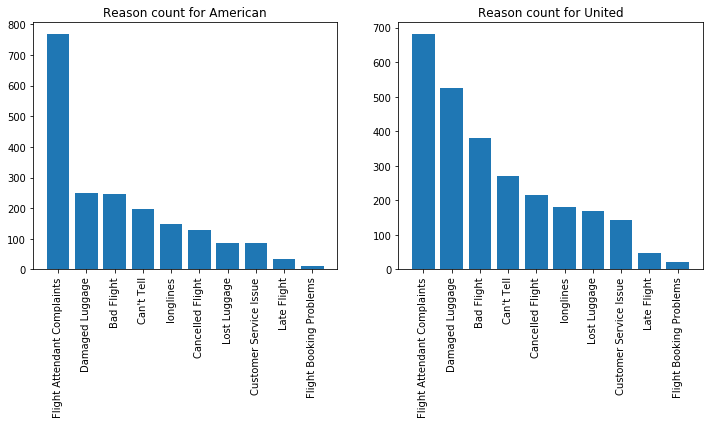

In [216]:
plt.figure(1,figsize=(12, 10))
plt.subplot(221)
plot_reasons('American')
plt.subplot(222)
plot_reasons('United')


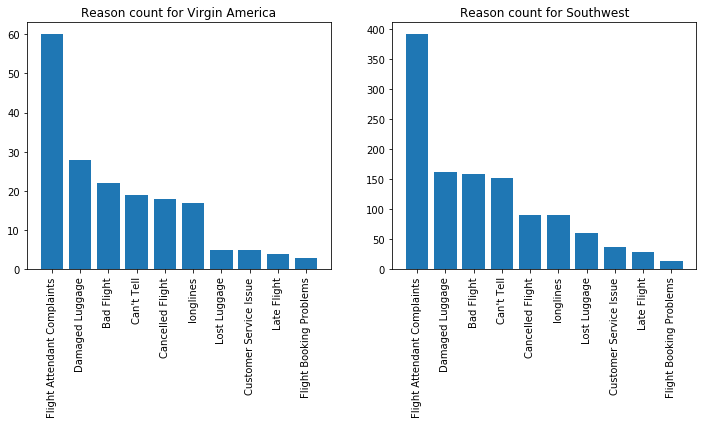

In [217]:
plt.figure(1,figsize=(12, 10))
plt.subplot(221)
plot_reasons('Virgin America')
plt.subplot(222)
plot_reasons('Southwest')

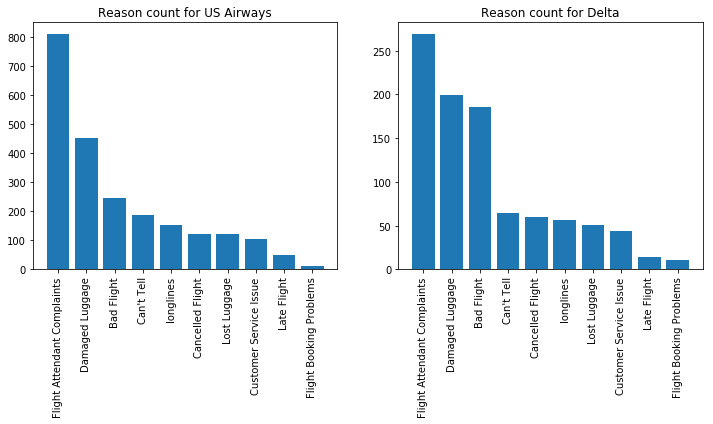

In [218]:
plt.figure(1,figsize=(12, 10))
plt.subplot(221)
plot_reasons('US Airways')
plt.subplot(222)
plot_reasons('Delta')

In [219]:
from wordcloud import WordCloud,STOPWORDS

In [220]:
df=tweet[tweet['airline_sentiment']=='negative']
words = ' '.join(df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [221]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

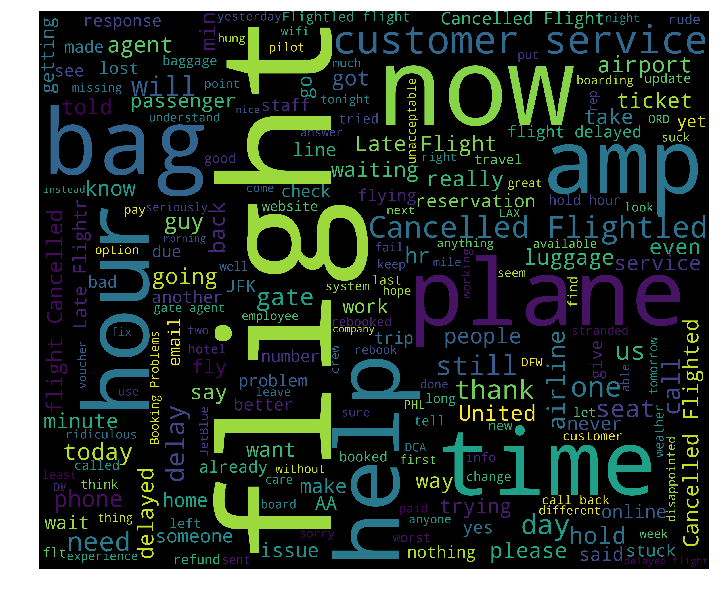

In [222]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

We can find that the Tweets with negative moods are frequently involved some words like cancelled, flight ,customer or hour. People might guess that customer tends to complain when they are waiting for the delayed flights

## Data preprocessing for classification

In [223]:
import re
import nltk
from nltk.corpus import stopwords

In [236]:
def tweet_into_words(tweet_data):
    letters_only = re.sub("[^a-zA-Z]", " ",tweet_data) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

In [237]:
def clean_tweet_length(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return(len(meaningful_words))

Categorizing the data into positive , negative and neutral and assigining values accordingly for building a model.

In [239]:
sentiments_match = {'positive': 1,'neutral': 0,'negative':-1}
tweet['sentiment'] = tweet['airline_sentiment'].map(sentiments_match)

In [240]:
tweet['clean_tweet']=tweet['text'].apply(lambda x: tweet_into_words(x))
tweet['Tweet_length']=tweet['text'].apply(lambda x: clean_tweet_length(x))
train,test = train_test_split(tweet,test_size=0.2,random_state=42)

In [242]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train['clean_tweet'])
test_features=v.transform(test['clean_tweet'])

#### Importing libraries for different models

In [243]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [272]:
Classifiers = [
    LogisticRegression(multi_class='multinomial', solver='newton-cg'),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier(),
    GaussianNB()]

In [273]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['sentiment'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['sentiment'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+' is: '+str(accuracy)) 

Accuracy of LogisticRegression is: 0.798155737704918
Accuracy of KNeighborsClassifier is: 0.5563524590163934
Accuracy of SVC is: 0.6451502732240437
Accuracy of DecisionTreeClassifier is: 0.6905737704918032
Accuracy of RandomForestClassifier is: 0.7681010928961749
Accuracy of AdaBoostClassifier is: 0.733948087431694
Accuracy of GaussianNB is: 0.48941256830601093


#### Compare the model performances

Text(0.5,1,'Accuracies of Models')

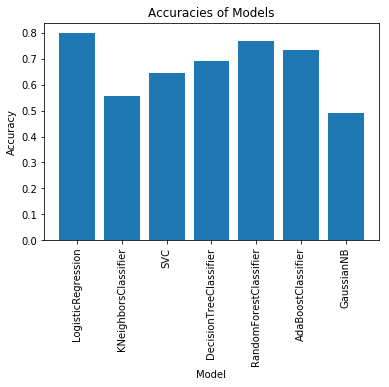

In [274]:
Index = [1,2,3,4,5,6,7]
plt.bar(Index,Accuracy)
plt.xticks(Index, Model,rotation=90)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')

From the above graph, we can see that **Logistic Regression and Random Forest Classifier** gives maximum accuracy of 79% and 76% respectively. 